In [1]:
%matplotlib inline
import numpy as np
import csv
import CoordinateConversion as CC
import matplotlib.pyplot as plt
from matplotlib import cm
# import pandas as pd
import math as m
import PyAstronomy as PA
from PyAstronomy import pyasl as PAP
from scipy import signal
import scipy.optimize as SO
import galpy.util.bovy_coords as gub

In [2]:
dpath = "/Users/htian/Documents/work/data/"
ppath = "/Users/htian/Documents/work/OC_STRUCTRUE/plot/"
fn = "OC_list.csv"

In [3]:
OID,TYPE,ra,dec,gl,gb,r0,r1,r2,pmra,pmdec,rv,erv,orv,dist,e_bv,logt,rc,rt,k,stype,FeH,Simbad=\
np.loadtxt(dpath+fn,skiprows=1,dtype={'names':('name','type','ra','dec','gl','gb','r0','r1',\
'r2','pmra','pmdec','rv','erv','orv','dist','Ebv','logt','rc','rt','k','SType','FeH','Simbad'),\
'formats':('17S','5S','float','float','float','float','float','float','float','float','float',\
'float','float','float','float','float','float','float','float','float','10S','float','10S')},\
unpack=True,delimiter=',')#,usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])

In [4]:
pmlb = gub.pmrapmdec_to_pmllpmbb(pmra,pmdec,ra,dec,degree=True)
pmll = pmlb[:,0]
pmbb = pmlb[:,1]
pmll0 = pmll*1.0
pmbb0 = pmbb*1.0
# pmll0[pmll0>5]=5
# pmbb0[pmbb0>5]=5
# pmll0[pmll0<-5]=-5
# pmbb0[pmbb0<-5]=-5
gl0 = gl*1.0
gl0[gl0>180] = gl0[gl0>180]-360
# dist0 = dist*1.0
# dist0[dist0>5000] = 5000
pma = np.arctan2(pmbb,pmll)*180/m.pi

In [5]:
# calc angular momentum
def calc_L(x,y,z,vx,vy,vz):
    AM = np.zeros((len(x),3))
    AM[:,0] = y*vz-z*vy
    AM[:,1] = z*vx-x*vz
    AM[:,2] = x*vy-y*vx
    return AM

In [36]:
VX_S,VY_S,VZ_S = 9.58,10.52,7.01
# xyzs = gub.lbd_to_XYZ(gl,gb,dist/1000,degree=True)
xs,ys,zs = CC.sph2xyz(90-gb,gl,dist/1000,Degree=True)
indv0 = (rv!=0.0) & (pmra!=0.0) & (pmdec!=0.0)
# VA = gub.vrpmllpmbb_to_vxvyvz(rv[indv0],pmll[indv0],pmbb[indv0],gl[indv0],gb[indv0],dist[indv0]/1000,degree=True)
VA = gub.vrpmllpmbb_to_vxvyvz(rv,pmll,pmbb,gl,gb,dist/1000,degree=True)
xg = xs-8
yg = ys
zg = zs
vxg = VA[:,0]+VX_S
vyg = VA[:,1]+VY_S+240
vzg = VA[:,2]+VZ_S
vzc = vzg
vac = vxg*np.sin(-1*gl)-vyg*np.cos(-1*gl)
vrc = vxg*np.cos(-1*gl)+vyg*np.sin(-1*gl)
vaza = np.arctan2(vzc,vac)*180/m.pi


LA = calc_L(xg,yg,zg,vxg,vyg,vzg)
LT = np.sqrt(LA[:,0]**2+LA[:,1]**2+LA[:,2]**2)
LXY = np.sqrt(LA[:,0]**2+LA[:,1]**2)

[-300, 300, -300, 300]

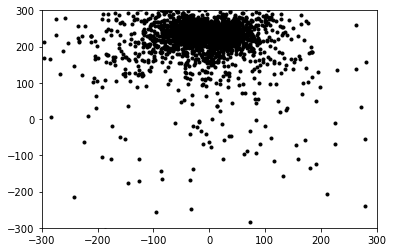

In [38]:
plt.plot(vxg,vyg,'k.')
plt.axis([-300,300,-300,300])

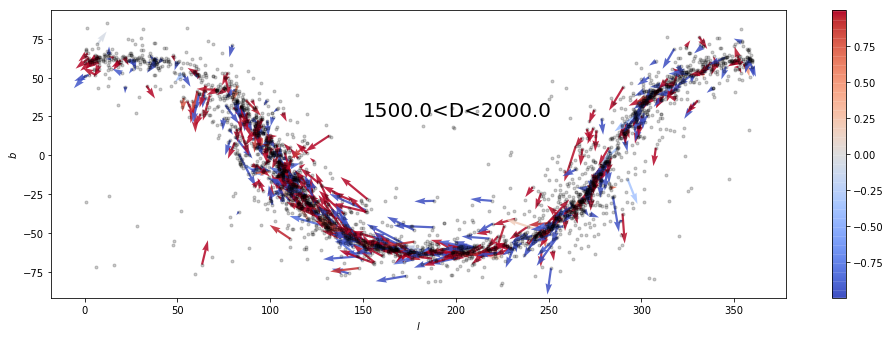

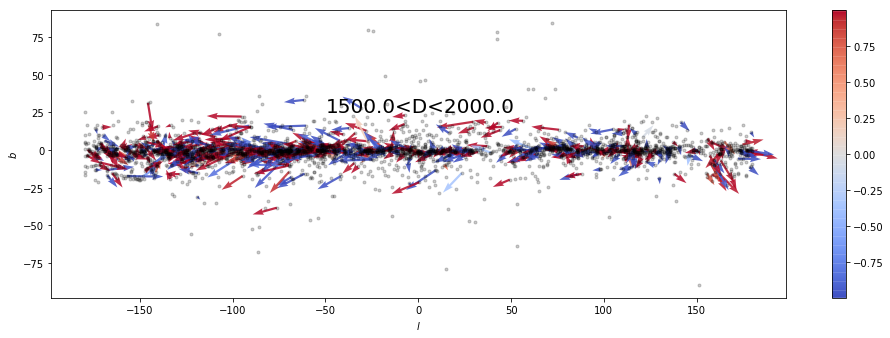

In [57]:
dr0 = np.linspace(0,15000,31)
dr = np.zeros((len(dr0)+1))
dr[:len(dr0)]=dr0[:]
dr[len(dr0)] = 1000000
for i in range(3,4):
#     print(i)
    dmin = dr[i]
    dmax = dr[i+1]
    indd = (dist>dmin) & (dist<dmax) & (pmra!=0.0) & (pmdec!=0.0)# & (np.abs(gb)>5)
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_axes([0.05,0.1,0.85,0.8])
#     print(len(gl0[indd]),len(vac[indd]))
#     ca = ax.quiver(gl0[indd], gb[indd], vac[indd],vzc[indd],np.cos(vaza[indd]*m.pi/180), width=0.003,alpha=.5,cmap=cm.coolwarm)
    plt.plot(ra,dec,'k.',alpha=0.2)
    ca = ax.quiver(ra[indd], dec[indd], pmra[indd],pmdec[indd],np.cos(vaza[indd]*m.pi/180), width=0.003,alpha=.85,cmap=cm.coolwarm)
#     ax.plot(gl0[indd],gb[indd],'k.')

#     ax.set_xlim([-180, 180])
#     ax.set_ylim([-90, 90])
    ax.set_xlabel("$l$")
    ax.set_ylabel("$b$")
    ax.text(150,25,"{dmin}<D<{dmax}".format(**locals()),fontsize=20)
    plt.colorbar(ca)
    plt.savefig(ppath+'OC_ra_dec_pm_d_{dmin}_{dmax}.eps'.format(**locals()))
    
    fig0 = plt.figure(figsize=(15,5))
    ax3 = fig0.add_axes([0.05,0.1,0.85,0.8])
#     print(len(gl0[indd]),len(vac[indd]))
#     ca = ax.quiver(gl0[indd], gb[indd], vac[indd],vzc[indd],np.cos(vaza[indd]*m.pi/180), width=0.003,alpha=.5,cmap=cm.coolwarm)
    plt.plot(gl0,gb,'k.',alpha=0.2)
    ca = ax3.quiver(gl0[indd], gb[indd], pmll[indd],pmbb[indd],np.cos(vaza[indd]*m.pi/180), width=0.003,alpha=.85,cmap=cm.coolwarm)
#     ax.plot(gl0[indd],gb[indd],'k.')

#     ax.set_xlim([-180, 180])
#     ax.set_ylim([-90, 90])
    ax3.set_xlabel("$l$")
    ax3.set_ylabel("$b$")
    ax3.text(-50,25,"{dmin}<D<{dmax}".format(**locals()),fontsize=20)
    plt.colorbar(ca)
    plt.savefig(ppath+'OC_l_b_vz_va_d_{dmin}_{dmax}.eps'.format(**locals()))
    
#     fig0 = plt.figure(figsize=(12,5))
#     ax1 = fig0.add_axes([0.05,0.1,0.85,0.8])
#     plt.plot(gl0[indd],pma[indd],'k.')
#     plt.axis([-180,180,-180,180])
#     plt.xlabel("$l$")
#     plt.ylabel("$\\phi$")
#     plt.savefig(ppath+'vza_angle_d_{dmin}_{dmax}.eps'.format(**locals()))
    
#     fig1 = plt.figure(figsize=(12,5))
#     ax2 = fig1.add_axes([0.05,0.1,0.85,0.8])
#     plt.plot(vac[indd],vrc[indd],'k.')
#     plt.axis([-200,400,-200,200])
#     plt.xlabel("$V_{\\phi}$")
#     plt.ylabel("$V_{R}$")
#     plt.savefig(ppath+'vza_angle_d_{dmin}_{dmax}.eps'.format(**locals()))
    
    

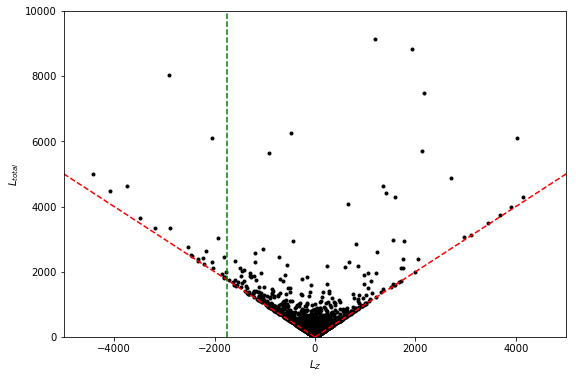

In [26]:
fig = plt.figure(figsize=(9,6))
plt.plot(LA[:,2],LT,'k.')
# plt.plot(LA[:,0],LXY,'k.')
plt.plot([0,15000],[0,15000],'r--')
plt.plot([0,-15000],[0,15000],'r--')
plt.plot([-8*220,-220*8],[0,100000],'g--')
plt.axis([-5000,5000,0,10000])
plt.xlabel("$L_Z$",fontsize=10)
plt.ylabel("$L_{total}$")
plt.savefig(ppath+'LZ_LT.eps')

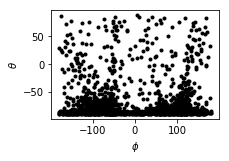

In [10]:
rA,thetaA,phiA = CC.xyz2sph(LA[:,0],LA[:,1],LA[:,2])
fig = plt.figure(figsize=(3,2))
plt.plot(phiA,90-thetaA,'k.')
plt.ylabel('$\\theta$',fontsize=10)
plt.xlabel('$\\phi$',fontsize=10)
plt.savefig(ppath+"angle_AM.eps")

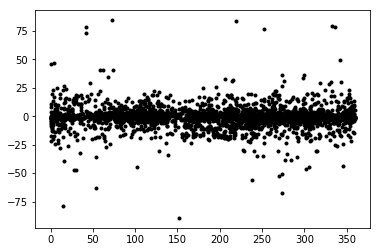

In [11]:
plt.plot(gl,gb,'k.')